In [2]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# cargar los datos
df = pd.read_csv('spectra_hlle_SNG.csv')

# separar las características (X) y la etiqueta (y)
X = df.drop('id', axis=1)
y = df['id']

# codificar la etiqueta (y)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)


In [3]:
df['id'].unique()

array([1, 2, 3], dtype=int64)

In [4]:
# crear el modelo
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(3, activation='softmax')
])

# compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [5]:
# entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
319/319 [==============================] - 4s 5ms/step - loss: 0.3590 - accuracy: 0.9497 - val_loss: 0.1839 - val_accuracy: 0.9509
Epoch 2/50
319/319 [==============================] - 1s 3ms/step - loss: 0.1635 - accuracy: 0.9530 - val_loss: 0.1187 - val_accuracy: 0.9541
Epoch 3/50
319/319 [==============================] - 1s 4ms/step - loss: 0.1072 - accuracy: 0.9615 - val_loss: 0.0773 - val_accuracy: 0.9666
Epoch 4/50
319/319 [==============================] - 1s 3ms/step - loss: 0.0771 - accuracy: 0.9700 - val_loss: 0.0632 - val_accuracy: 0.9776
Epoch 5/50
319/319 [==============================] - 1s 3ms/step - loss: 0.0660 - accuracy: 0.9743 - val_loss: 0.0578 - val_accuracy: 0.9800
Epoch 6/50
319/319 [==============================] - 1s 4ms/step - loss: 0.0626 - accuracy: 0.9773 - val_loss: 0.0554 - val_accuracy: 0.9812
Epoch 7/50
319/319 [==============================] - 1s 3ms/step - loss: 0.0578 - accuracy: 0.9779 - val_loss: 0.0526 - val_accuracy: 0.9823
Epoch 

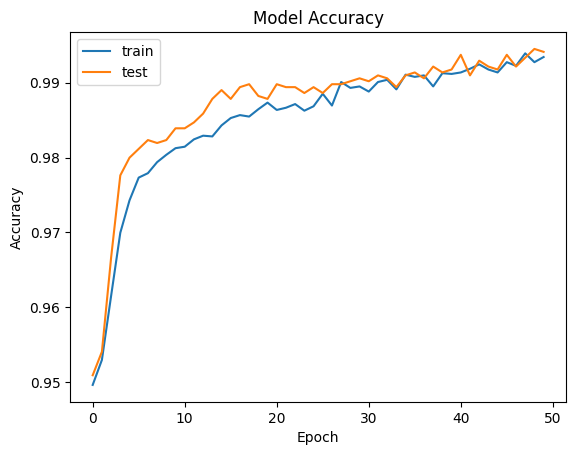

In [6]:
# graficar la precisión de entrenamiento y prueba
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


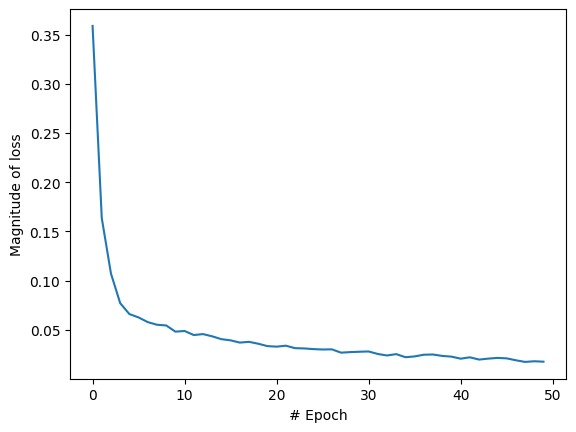

In [13]:
plt.xlabel("# Epoch")
plt.ylabel("Magnitude of loss")
plt.plot(history.history["loss"])

In [7]:
y=df['id']
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame(y)
encoder = LabelEncoder()
df['codificado'] = encoder.fit_transform(df['id'])

nombres_etiquetas = encoder.classes_
nuevos_nombres = ['Symbiotics', 'Planetary Nebulae', 'Red Giants']
nombres_etiquetas_dict = {nombres_etiquetas[i]: nuevos_nombres[i] for i in range(len(nombres_etiquetas))}
df['nombres_etiquetas'] = df['id'].map(nombres_etiquetas_dict)

df_agrupado = df.groupby('nombres_etiquetas')['codificado'].mean()
print(df_agrupado)

nombres_etiquetas
Planetary Nebulae    1.0
Red Giants           2.0
Symbiotics           0.0
Name: codificado, dtype: float64


In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix

# predecir las probabilidades para los datos de prueba
y_probs = model.predict(X_test)
y_pred = np.argmax(y_probs, axis=-1)
cm = confusion_matrix(y_test, y_pred)
print(cm)


80/80 [==============================] - 0s 1ms/step
[[  32    5    1]
 [   2   82    1]
 [   5    1 2419]]


In [9]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.8205    0.8421    0.8312        38
           1     0.9318    0.9647    0.9480        85
           2     0.9992    0.9975    0.9983      2425

    accuracy                         0.9941      2548
   macro avg     0.9172    0.9348    0.9258      2548
weighted avg     0.9943    0.9941    0.9942      2548



In [10]:
from sklearn.metrics import  accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9941130298273155


In [11]:
print("size of the splits")
print("X_train: ",  X_train.shape)
print("X_test: ",  X_test.shape)
print("y_test: ",  y_test.size)
print("y_pred: ",  y_pred.size)

size of the splits
X_train:  (10189, 15)
X_test:  (2548, 15)
y_test:  2548
y_pred:  2548


In [12]:
model.save('HLLE_RNA_SNG.h5')